In [1]:
%matplotlib inline
from segmnist import create_dataset_generator 

base_params = {
    'mnist_dataset': 'mnist-training',
    'digit_positioning': 'random',
    'scale_range': (0.75, 1.5),
    'im_shape': (3, 56, 56),
    'bg_pix_mul': 3,
    'batch_size': 256,
    'min_digits': 2,
    'max_digits': 3,
    'nclasses': 12,
    'p_fgmodatt_set': 0.0,
    'pwhitenoise': 0.0,
    'pgratings': 0.0,
    'pfgmod': 0.0,
    'fgmod_indepcols': 0.0,
    'fgmod_texalpha': (0.5,1),
    'fgmod_min_area': 0,
    'pintermix': 0.0,
    'classfreq': (1,1,1,1,1, 1,1,1,1,1, 5.0,5.0) }
param_sets = dict()
param_sets['whitenose'] = base_params.copy()
param_sets['whitenose']['pwhitenoise'] = 1.0
param_sets['gratings'] = base_params.copy()
param_sets['gratings']['pgratings'] = 1.0
param_sets['fgmod'] = base_params.copy()
param_sets['fgmod']['pfgmod'] = 1.0
param_sets['fgmod_texalpha0'] = param_sets['fgmod'].copy()
param_sets['fgmod_texalpha0']['fgmod_texalpha'] = (0,0.1)
param_sets['fgmod_texalpha1'] = param_sets['fgmod'].copy()
param_sets['fgmod_texalpha1']['fgmod_texalpha'] = (1,1)
param_sets['fgmod_indepcols'] = param_sets['fgmod'].copy()
param_sets['fgmod_indepcols']['fgmod_indepcols'] = 1

param_sets['no_intermix'] = base_params.copy()
param_sets['no_intermix']['pfgmod'] = 0.33
param_sets['no_intermix']['pgratings'] = 0.33
param_sets['no_intermix']['pwhitenoise'] = 0.33

param_sets['intermix'] = param_sets['no_intermix'].copy()
param_sets['intermix']['pintermix'] = 1.0

%pdb on

Automatic pdb calling has been turned ON


/home/jonathan/.virtualenvs/sbalk/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


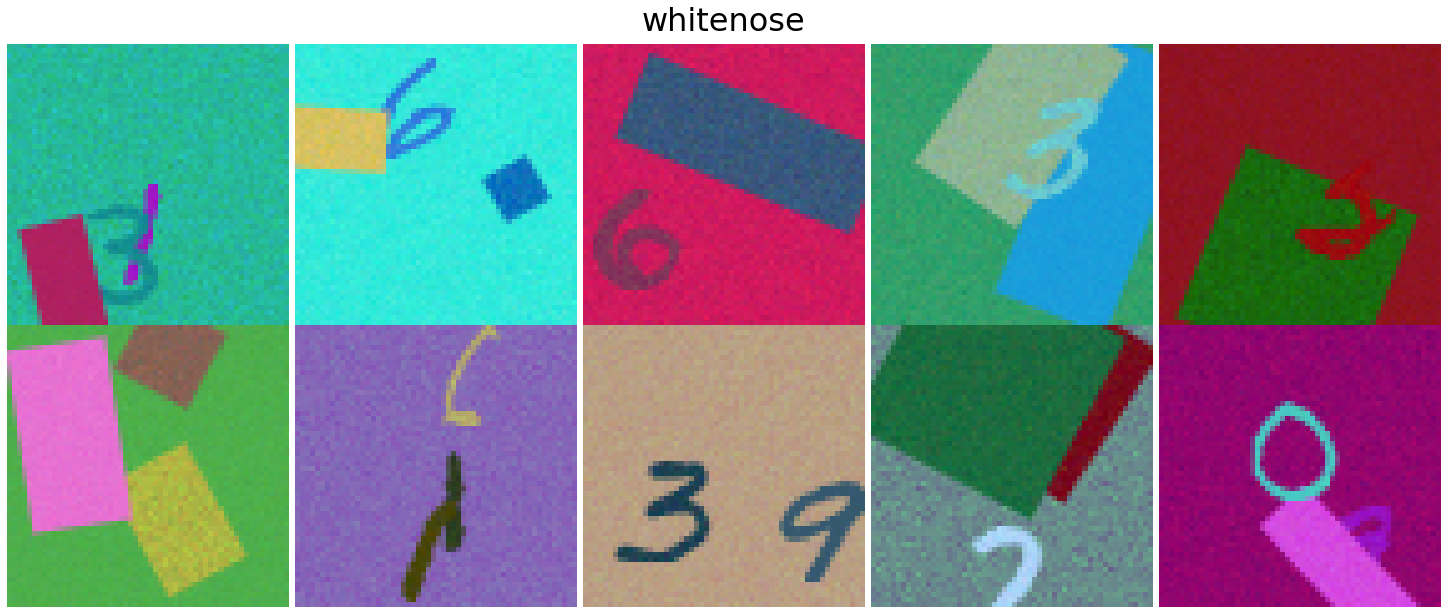

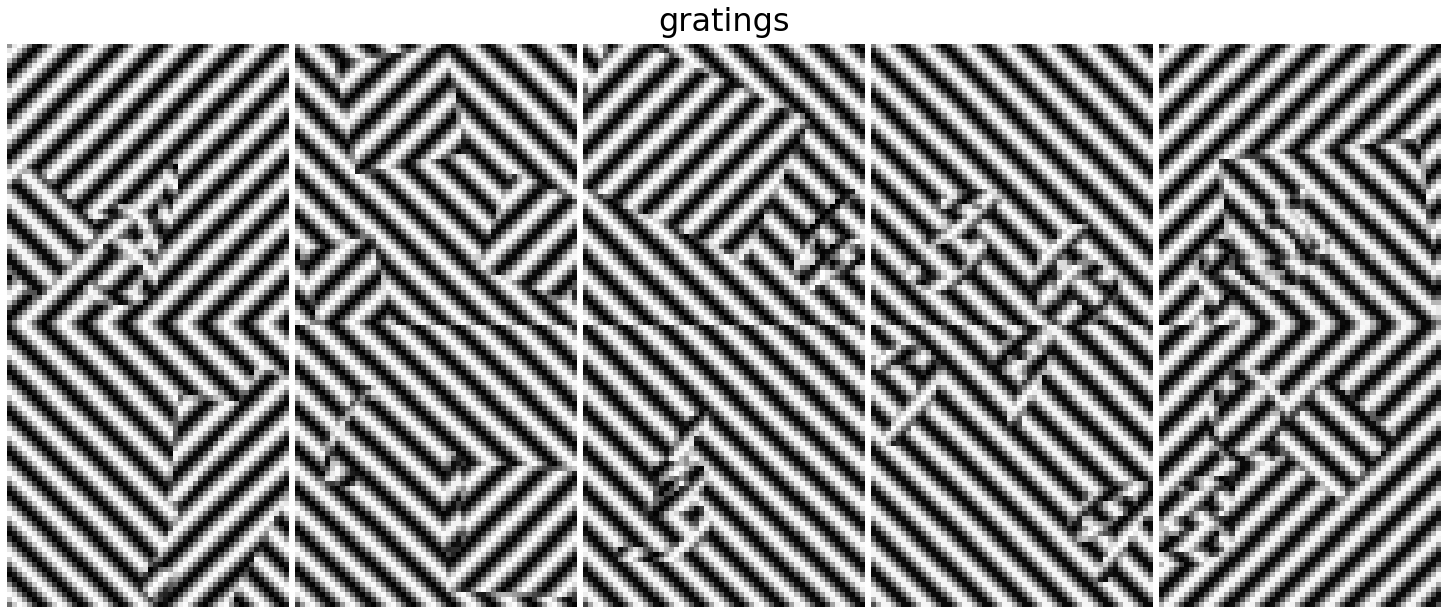

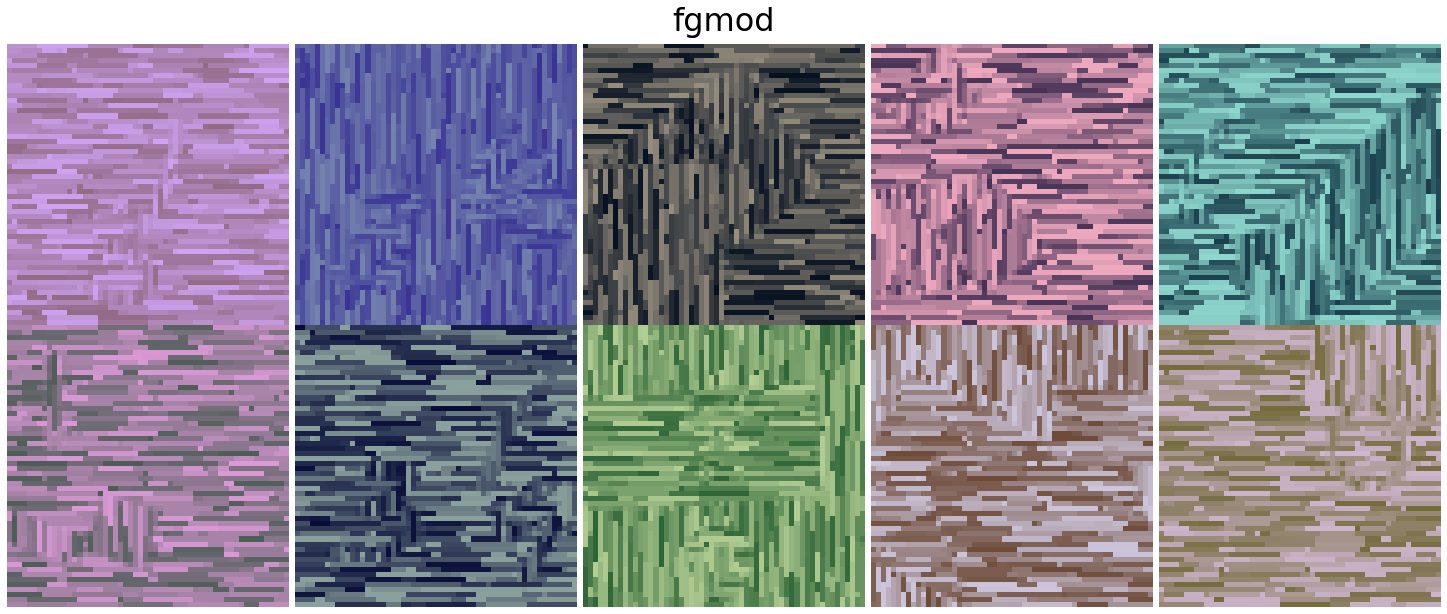

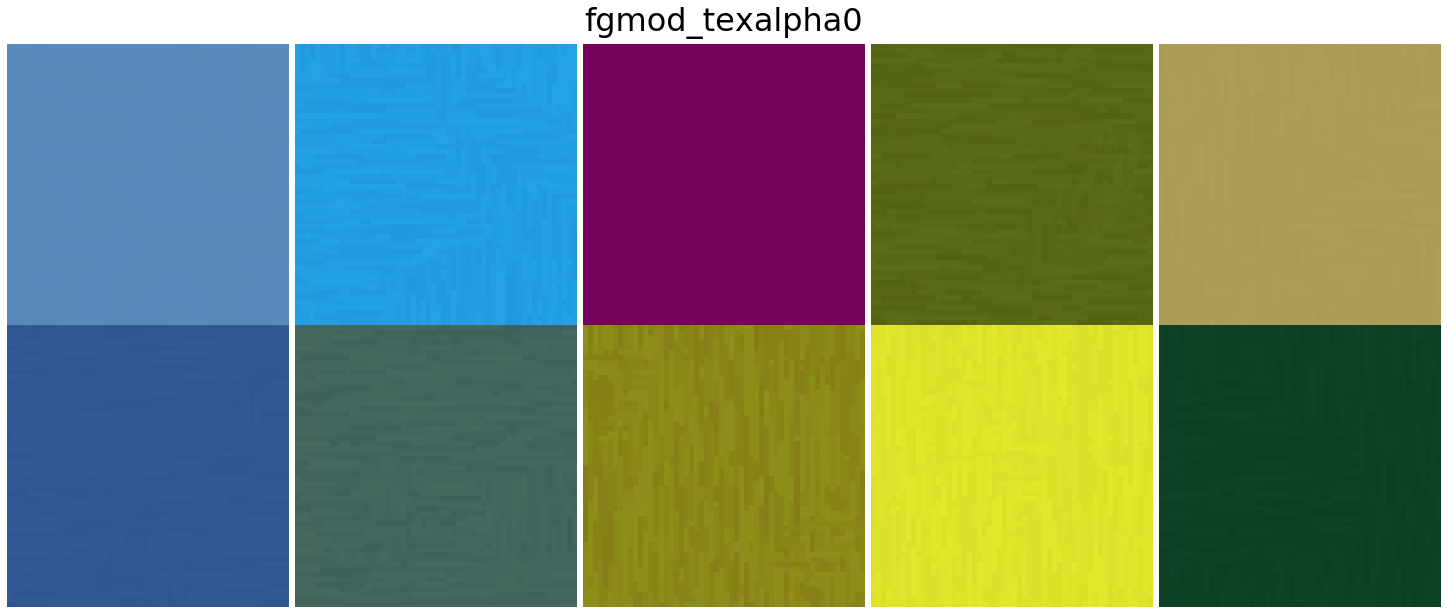

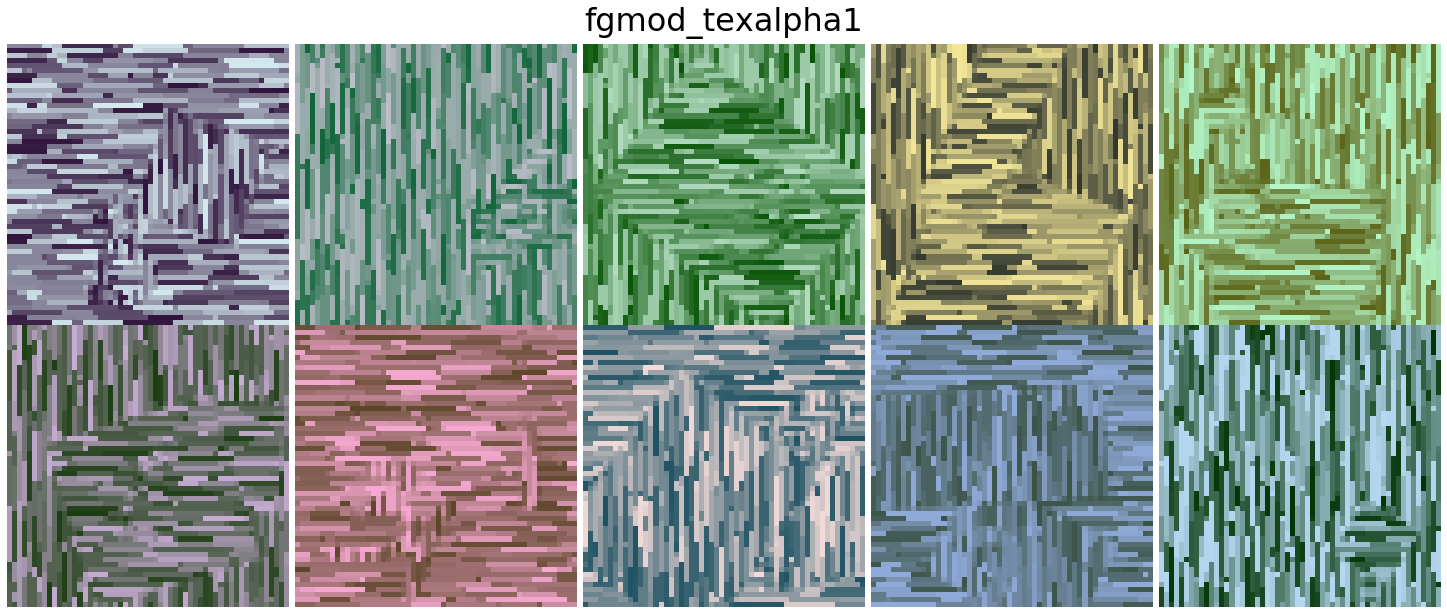

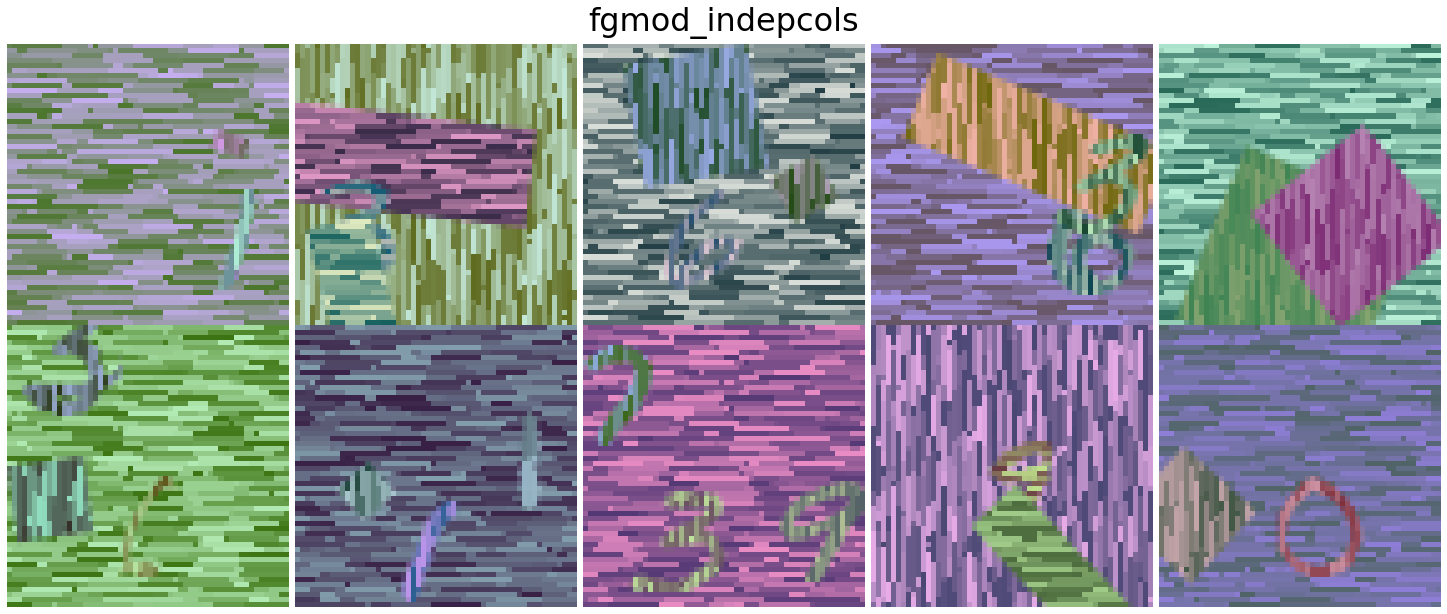

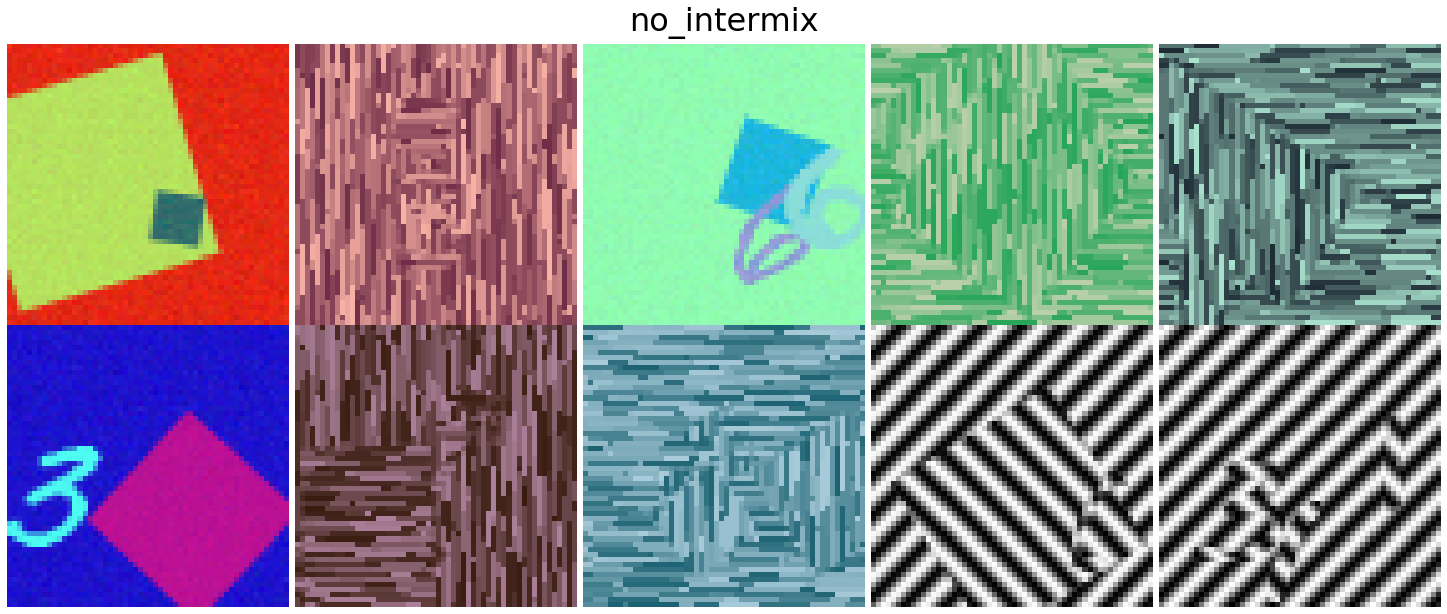

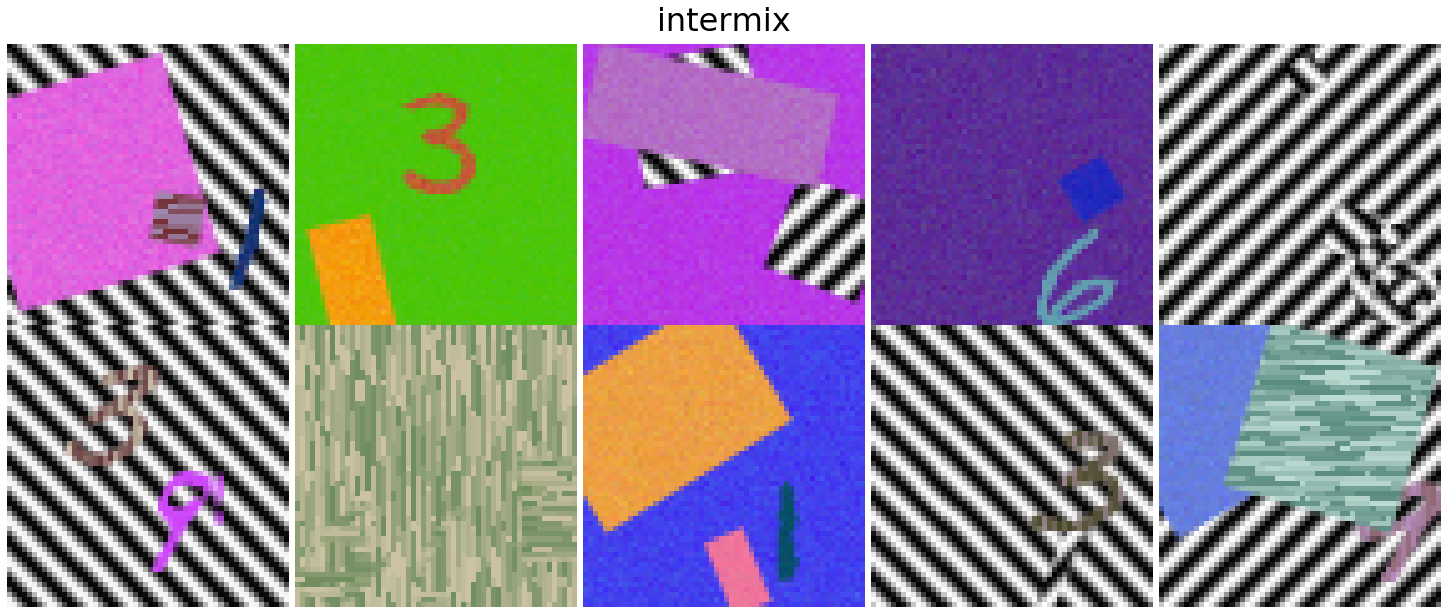

In [5]:
import PIL
import IPython.display
import matplotlib.pyplot as plt
for paramset_name, params in param_sets.items():
    dataset_generator = create_dataset_generator(**params)
    
    fig, axes = plt.subplots(2, 5, squeeze=False, figsize=(20,8.5))
    for ax in axes.flat:
        (img_data, cls_label, seg_label) = dataset_generator.create_batch(1)
        im = img_data[0].transpose((1,2,0))
        ax.imshow(im)
        ax.set_axis_off()
        # pim = PIL.Image.fromarray(
        # IPython.display.display(pim)
    fig.suptitle(paramset_name, fontsize=32)
    fig.subplots_adjust(wspace=0, hspace=0, left=0, right=1, top=0.92, bottom=0)
    fig.show()